<a href="https://colab.research.google.com/github/SanjnaReddy27/Fall-2023-CS5720/blob/main/Neural_Networks_and_Deep_Learning_ICP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACTICE

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-v0_8-white')

Neural Networks and Deep Learning - ICP-4

1. Data Manipulation

a. Read the provided CSV file ‘data.csv’.

b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing

c. Show the basic statistical description about the data.

d. Check if the data has null values.

i. Replace the null values with the mean

e. Select at least two columns and aggregate the data using: min, max, count,mean.

f. Filter the dataframe to select the rows with calories values between 500 and1000.

g. Filter the dataframe to select the rows with calories values > 500 and pulse <100.

h. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

i. Delete the “Maxpulse” column from the main df dataframe.

j. Convert the datatype of Calories column to int datatype.

k. Using pandas create a scatter plot for the two columns (Duration and Calories).

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
          Calories       Pulse
min      50.300000   80.000000
max    1860.400000  159.000000
count   169.000000  169.000000
mean    375.790244  107.461538


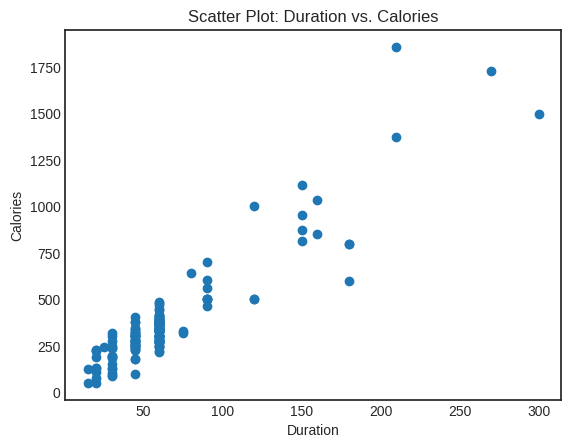

In [16]:
import pandas as pd

# Step a: Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/data.csv')

# Step c: Show basic statistical description
description = df.describe()
print(description)

# Step d: Check for null values and replace with mean
if df.isnull().any().any():
    df.fillna(df.mean(), inplace=True)

# Step e: Select and aggregate columns
selected_columns = ['Calories', 'Pulse']
aggregated_data = df[selected_columns].agg(['min', 'max', 'count', 'mean'])
print(aggregated_data)

# Step f: Filter rows with calories between 500 and 1000
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

# Step g: Filter rows with calories > 500 and pulse < 100
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]

# Step h: Create a new dataframe with columns except "Maxpulse"
df_modified = df.drop(columns=['Maxpulse'])

# Step i: Delete the "Maxpulse" column from the main dataframe
df.drop(columns=['Maxpulse'], inplace=True)

# Step j: Convert Calories column to int datatype
df['Calories'] = df['Calories'].astype(int)

# Step k: Create a scatter plot for Duration and Calories
import matplotlib.pyplot as plt

plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot: Duration vs. Calories')
plt.show()


2. Linear Regression

a) Import the given “Salary_Data.csv”

b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

c) Train and predict the model.

d) Calculate the mean_squared error

e) Visualize both train and test data using scatter plot.

Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


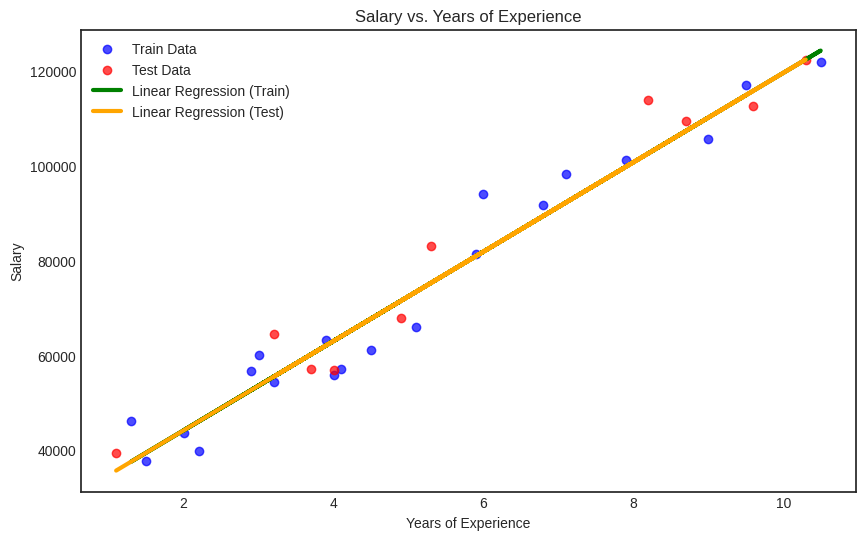

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step a: Import the CSV data
data = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')

# Step b: Split data into train and test sets
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Step c: Train and predict using Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step d: Calculate mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

# Step e: Visualize train and test data using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Train Data', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Data', color='red', alpha=0.7)
plt.plot(X_train, y_train_pred, color='green', linewidth=3, label='Linear Regression (Train)')
plt.plot(X_test, y_test_pred, color='orange', linewidth=3, label='Linear Regression (Test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.legend()
plt.show()
